# Stocks k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("sample_stocks.csv")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
returns          648 non-null int64
dividendyield    648 non-null float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


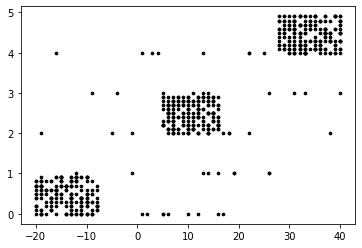

In [10]:
plt.scatter(data['returns'], data['dividendyield'], c='black', s=7)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(data)

X = scaler.transform(data) 

In [12]:
X

array([[-1.5024685 , -1.48095143],
       [-1.19537158, -1.48095143],
       [-1.2465544 , -1.48095143],
       ...,
       [-0.47881211,  0.95225478],
       [ 0.59602709,  0.95225478],
       [-1.34892004,  0.95225478]])

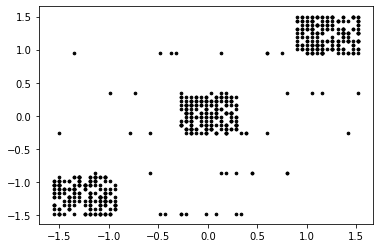

In [5]:
plt.scatter(X[:,0], X[:,1], c='black', s=7)

[[-1.21324883 -1.20474178]
 [ 1.20067006  1.21012806]
 [ 0.01143028 -0.00489449]]


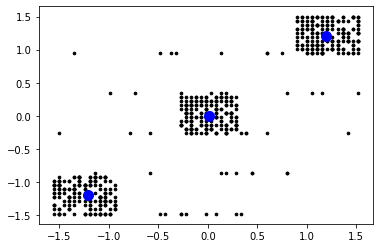

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
centroids = kmeans.cluster_centers_

print(centroids)

plt.scatter(X[:,0], X[:,1], c='black', s=7)

for i in range(3):
    plt.scatter(centroids[i][0], centroids[i][1],c='blue', s=100)

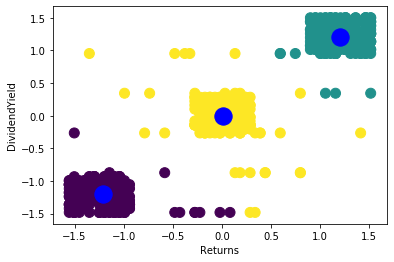

In [7]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'blue',label= 'Centroids')
plt.xlabel('Returns')
plt.ylabel('DividendYield')
 
plt.show()

1 1296.0
2 386.98068568789614
3 77.62109287678899
4 61.645431515125466
5 55.73980978880691
6 48.215937704102785
7 41.90382974550282
8 37.31536655753263
9 33.866642789866205


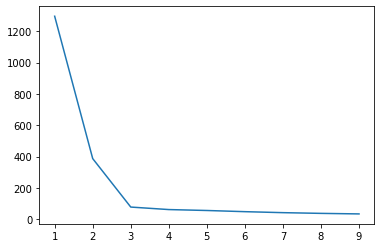

In [8]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    inertia.append(kmeans.inertia_)  
plt.plot(range(1, 10), inertia)
plt.show()